In [ ]:
!pip freeze > requirements.txt

Let's prep the environment.

In [ ]:
!pip install torch

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
# importing hugging face datasets
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00


In [ ]:
!pip install seaborn

In [ ]:
# Install Tersonflow version 2.14.0
!pip install tensorflow==2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling te

Next, we'll import the required libraries

In [ ]:
# import the necessary libraries
import os
import pandas as pd
import numpy as np
import regex as re
import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score, roc_auc_score, precision_score
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
import contractions

# wordcloud
from wordcloud import WordCloud

# Sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score, roc_auc_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Perceptron
import seaborn as sns
import matplotlib.pyplot as plt

# torch libraries
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.nn.functional as F

# filter warnings
import warnings
warnings.filterwarnings('ignore')

# Roberta-base libraries
from datasets import load_dataset
from transformers import pipeline
from transformers import TrainingArguments
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# import libraries
from google.colab import files
from google.colab import drive

We'll work on Google Drive and so mounting it is important for easy access of files.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Let's download the Kaggel dataset we are working with. This dataset has over 22 million tweets and so is split into two csv files.

Reference: https://www.kaggle.com/datasets/hiraddolatzadeh/bitcoin-tweets-2021-2022/data

In [ ]:
# Path to CSV file in Google Drive
csv_file_path = '/content/gdrive/MyDrive/Capstone/bitcoin-tweets-2021.csv'

# Read the CSV file into a DataFrame
df1 = pd.read_csv(csv_file_path, lineterminator='\n', parse_dates=['datetime'])

In [ ]:
# Path to CSV file in Google Drive
csv_file_path = '/content/gdrive/MyDrive/Capstone/bitcoin-tweets-2022.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(csv_file_path, lineterminator='\n', parse_dates=['datetime'])

Let's see what these dataframes look like.

In [ ]:
# Let's look at df1 head
df1.head()

,datetime,username,text
0,2021-01-01 23:59:58+00:00,WoodooProd,Crypto adoption in 2021: Top trends and predic...
1,2021-01-01 23:59:53+00:00,YSojourners,Ripple Executive Says US Laws on Crypto Are Va...
2,2021-01-01 23:59:53+00:00,Andama_n,@hextoysofficial | https://t.co/C6LPpuq05n Are...
3,2021-01-01 23:59:51+00:00,YSojourners,FUN and Games: Altcoin Drastically Pumps And D...
4,2021-01-01 23:59:50+00:00,HunnerSa,I bought #Bitcoin at 6k-8k-9k-12k-16k-19k and ...


In [ ]:
# Let's look at df2 head
df2.head()

,datetime,date,username,text
0,2022-01-01 23:59:56+00:00,2022-01-01,priconoticias,0.4MOT TOKENS IN #LATOKEN airdrop and maybe m...
1,2022-01-01 23:59:53+00:00,2022-01-01,mmonlineonline,MARA for Bitcoin Exposure: Top Trade Q1 2022 h...
2,2022-01-01 23:59:43+00:00,2022-01-01,CoachKevinRose,Every Time the Bell Rings The Titano makes MON...
3,2022-01-01 23:59:35+00:00,2022-01-01,robert54177167,If your interested in losing money in 2022 kee...
4,2022-01-01 23:59:34+00:00,2022-01-01,WorldCoinIndex,Bitcoin price index https://t.co/o7UcHJUhC6 #U...


We'll now concatinate the two dataframes into one.

In [ ]:
# concatinating the two dataframes into one
tweets = pd.concat([df1, df2.drop('date', axis=1)], axis=0).sort_values(by=['datetime'], ignore_index=True).reset_index(drop=True)
print(len(tweets))

22907548


Social media is inflitrated by bots and fake accounts now a days and so its important to filter out advertisements from our corpus. We'll do that by defining what are "noise words" for us.

In [ ]:
# noise words are words usually used by advertisements
noise_words = ['free', 'freebitcoin', 'freeminingsoftware', 'freebitco', 'free bitcoin', 'makemoney', 'make money',
          'abtcl', 'tradingtool', 'trading tool', 'residualbitcoin', 'faucet', 'casino',
          'simplefx', 'nitrogensportsbook', 'makeyourownlane', 'bet', 'bitcoinbet', 'webbot', 'win', 'game', 'lottery',
          'bitcoinprice','bitcoin price' , 'mpgvip', 'footballcoin', 'earnbitcoin', 'earn bitcoin',
           'trading', 'price', 'performing currency', 'altcoin', 'fintech', 'pic']

Now, we can move to cleaning our corpus. Below is a funnel for the same.

In [ ]:
# Step 1: Data Inspection
print("Step 1: Data Inspection")
print("Initial Data Shape:", tweets.shape)

# Step 2: Data Cleaning Steps

# Step 2.1: Handle Missing Data
tweets.dropna(inplace=True)

print("Step 2.1: Handle Missing Data")
print("Data Shape after Handling Missing Data:", tweets.shape)

# Step 2.2: Convert Text to Lowercase
tweets["text"] = tweets["text"].str.lower()
print("Step 2.2: Convert Text to Lowercase")
print("Data Shape after Converting Text to Lowercase:", tweets.shape)

# Step 2.3: Remove Tweets with Noise Words
tweets = tweets[~tweets.text.str.contains('|'.join(noise_words))]
print("Step 2.3: Remove Tweets with Noise Words")
print("Data Shape after Removing Tweets with Noise Words:", tweets.shape)

# Step 2.4: Filter Tweets Containing 'bitcoin'
tweets_bitcoin = tweets[tweets['text'].str.contains('bitcoin')]
print("Step 2.4: Filter Tweets Containing 'bitcoin'")
print("Data Shape after Filtering Tweets Containing 'bitcoin':", tweets_bitcoin.shape)

# Remove Duplicates
if 'text' in tweets_bitcoin.columns:
    # Step 2.5: Remove Duplicate Tweets
    tweets_bitcoin = tweets_bitcoin.drop_duplicates(subset="text", keep="first")
    print("Step 2.5: Remove Duplicate Tweets")
    print("Data Shape after Removing Duplicate Tweets:", tweets_bitcoin.shape)

    # Step 2.6: Remove Tweets with Specified Phrases
    phrases_to_remove = ['new year', 'happy new year', 'new_year', 'happynewyear', 'happy birthday']
    mask = ~tweets_bitcoin['text'].str.contains('|'.join(phrases_to_remove))
    tweets_bitcoin = tweets_bitcoin[mask]
    print("Step 2.6: Remove Tweets with Specified Phrases")
    print("Final Data Shape after All Cleaning Steps:", tweets_bitcoin.shape)
else:
    print("Step 2.5: 'text' column not found in DataFrame. Check previous steps.")

# Reset Index
tweets_bitcoin.reset_index(drop=True, inplace=True)

# Check tweets_bitcoin
tweets_bitcoin.head()

Step 1: Data Inspection
Initial Data Shape: (22907548, 3)
Step 2.1: Handle Missing Data
Data Shape after Handling Missing Data: (22907547, 3)
Step 2.2: Convert Text to Lowercase
Data Shape after Converting Text to Lowercase: (22907547, 3)
Step 2.3: Remove Tweets with Noise Words
Data Shape after Removing Tweets with Noise Words: (17464334, 3)
Step 2.4: Filter Tweets Containing 'bitcoin'
Data Shape after Filtering Tweets Containing 'bitcoin': (17436205, 3)
Step 2.5: Remove Duplicate Tweets
Data Shape after Removing Duplicate Tweets: (16586415, 3)
Step 2.6: Remove Tweets with Specified Phrases
Final Data Shape after All Cleaning Steps: (16567626, 3)


,datetime,username,text
0,2021-01-01 00:00:02+00:00,CryptoNetDaily,"new #crypto daily candle! 🕯️\n $btc $28,936..."
1,2021-01-01 00:00:04+00:00,WSJ,high fees and volatility present obstacles to ...
2,2021-01-01 00:00:06+00:00,awesomepersona2,do you own any cryptocurrency like #bitcoin \n...
3,2021-01-01 00:00:07+00:00,JeremyKissel,"ethereum posts 450% gain in 2020, beats bitcoi..."
4,2021-01-01 00:00:07+00:00,vpaul8483,@cashapp i love bitcoin!!! $matt121991


Given the limitations on time and resources, we'll work with a sample.

In [ ]:
# defining sample size
sample_size = 1000000

# Take a random sample of 1 million tweets
sample_tweets = tweets_bitcoin.sample(n=sample_size, random_state=42)

# Display the shape of sample DataFrame
print(sample_tweets.shape)

(1000000, 3)


The column 'datetime' is not easy to read, we'll go ahead and split it.

In [ ]:
# Function for column funnel
def column_funnel(data):
    # Step 1: Extract month and year from datetime
    data['month'] = data['datetime'].dt.month
    data['year'] = data['datetime'].dt.year

    # Step 2: Drop the datetime column
    data = data.drop(['datetime'], axis=1)

    # Step 3: Rename the column 'text' to 'tweet'
    data = data.rename(columns={'text': 'tweet'})

    # Step 4: Rearrange columns
    data = data[['year', 'month', 'username', 'tweet']]

    return data

# Apply the column funnel to DataFrame (tweets_bitcoin)
sample_tweets = column_funnel(sample_tweets)

# Display the shape of the cleaned DataFrame
print("Shape of sample_tweets:", sample_tweets.shape)

Shape of sample_tweets: (1000000, 4)


In [ ]:
# Let's look at head of our new dataframe
sample_tweets.head()

,year,month,username,tweet
463915,2021,1,CoinFlipperDude,bitcoin about to get crushed??? https://t.co/e...
13037707,2022,3,PopunderTraffic,bitcoin layer 3: what is the impervious browse...
4946732,2021,5,sequencecentral,"banks pollute way more than bitcoin, study fin..."
1461125,2021,2,cryptochrisser,@wiredbitcoin @bitcoin_brown this!
16197152,2022,6,KDZKris,"@btc_archive if you truly believe in #bitcoin,..."


Going forward, we'll be saving files, models etc on Google Drive in case of session crash and thus these files can then we retrieved from Drive for a new session and we'll not have to repeat our work.

In [ ]:
# Define the directory
output_dir = '/content/gdrive/MyDrive/Capstone/Bitcoin/'

# Define the file name
file_name = 'sample_tweets.csv'

# Save the DataFrame to a CSV file in Google Drive
sample_tweets.to_csv(output_dir + file_name, index=False)

We're no longer working with the previous corpus since changes were made and so we'll delete these.

In [ ]:
# deleting the dataframes no longer needed
del df1, df2, tweets, tweets_bitcoin

In [ ]:
# Retrieve in case of session crash
csv_path = '/content/gdrive/MyDrive/Capstone/Bitcoin/sample_tweets.csv'

# Load the DataFrame
sample_tweets = pd.read_csv(csv_path, lineterminator='\n')

# Check to confirm csv file retrieveted properly
sample_tweets.head()

,year,month,username,tweet
0,2021,1,CoinFlipperDude,bitcoin about to get crushed??? https://t.co/e...
1,2022,3,PopunderTraffic,bitcoin layer 3: what is the impervious browse...
2,2021,5,sequencecentral,"banks pollute way more than bitcoin, study fin..."
3,2021,2,cryptochrisser,@wiredbitcoin @bitcoin_brown this!
4,2022,6,KDZKris,"@btc_archive if you truly believe in #bitcoin,..."


We'll now use 'Stopwords'. from NLTK library. Only change here is, I've decided to remove the word 'not' from Stopwords given that 'not' is important to understand negative sentiment.

In [ ]:
# Step 1: Initialize Lemmatizer and Stopwords
lemma = WordNetLemmatizer()
stop_words = stopwords.words("english")

# word 'not' can add sentiment, so we should not remove it
if 'not' in stop_words:
    stop_words.remove('not')

# Check if 'not' is in the set of stop words
if 'not' in set(stop_words):
    print("Step 1: Initialize Lemmatizer and Stopwords")
    print("Lemmatizer and Stopwords Initialized Successfully, 'not' in Stopwords")
else:
    print("Step 1: Initialize Lemmatizer and Stopwords")
    print("'not' added to Stopwords Successfully")

Step 1: Initialize Lemmatizer and Stopwords
'not' added to Stopwords Successfully


Finally, we can move ahead with cleaning our tweets. Below we have defined a function for the same.

In [ ]:
def clean_tweet(tweet):
    # Expand contractions
    tweet = contractions.fix(tweet)

    # Rest of our cleaning steps
    tweet = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweet)
    tweet = re.sub('\$[a-zA-Z0-9]*', ' ', tweet)
    tweet = re.sub('\@[a-zA-Z0-9]*', ' ', tweet)
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    tweet = ' '.join([w for w in tweet.split() if len(w) > 1])

    tokens = nltk.wordpunct_tokenize(tweet)
    tweet = [lemma.lemmatize(x) for x in tokens if x not in stop_words]
    tweet = [lemma.lemmatize(x, nltk.corpus.reader.wordnet.VERB) for x in tokens if x not in stop_words]
    return ' '.join(tweet)

In [ ]:
# Apply the function
sample_tweets["cleaned_tweet"] = sample_tweets["tweet"].apply(clean_tweet)

What's the new shape of our corpus?

In [ ]:
# Let's check the corpus shape
sample_tweets.shape

(1000000, 5)

In [ ]:
# Set the option to display full content in a column
pd.set_option('display.max_colwidth', None)

In [ ]:
# Define the directory
output_dir = '/content/gdrive/MyDrive/Capstone/Bitcoin/'

# Define the file name
file_name = 'sample_tweets.csv'

# Save the DataFrame to a CSV file in Google Drive
sample_tweets.to_csv(output_dir + file_name, index=False)

In [ ]:
# Retrieve in case of session crash
csv_path = '/content/gdrive/MyDrive/Capstone/Bitcoin/sample_tweets.csv'

# Load the DataFrame
sample_tweets = pd.read_csv(csv_path, lineterminator='\n')

Let's get the TweetEval dataset, available in Hugging Face library.

In [ ]:
# Load the sentiment part of the TweetEval dataset
dataset = load_dataset("tweet_eval", "sentiment")

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# Load each split of the dataset
train_dataset = pd.DataFrame(dataset['train'])
test_dataset = pd.DataFrame(dataset['test'])
val_dataset = pd.DataFrame(dataset['validation'])

# Separating features and target labels for each split
X_train, y_train = train_dataset['text'], train_dataset['label']
X_test, y_test = test_dataset['text'], test_dataset['label']
X_val, y_val = val_dataset['text'], val_dataset['label']

What's the label mapping in TweetEval?

In [ ]:
# https://github.com/cardiffnlp/tweeteval/blob/main/datasets/sentiment/mapping.txt

file_path = '/content/gdrive/MyDrive/Capstone/Bitcoin/mapping.txt'

# Open the file and read contents
with open(file_path, 'r') as file:
    mapping = file.read()

# Print the contents
print(mapping)

0	negative
1	neutral
2	positive



In [ ]:
X_train.head()

0                        "QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"
1                                                           "Ben Smith / Smith (concussion) remains out of the lineup Thursday, Curtis #NHL #SJ"
2                   Sorry bout the stream last night I crashed out but will be on tonight for sure. Then back to Minecraft in pc tomorrow night.
3    Chase Headley's RBI double in the 8th inning off David Price snapped a Yankees streak of 33 consecutive scoreless innings against Blue Jays
4                             @user Alciato: Bee will invest 150 million in January, another 200 in the Summer and plans to bring Messi by 2017"
Name: text, dtype: object

In [ ]:
y_train.head()

0    2
1    1
2    1
3    1
4    2
Name: label, dtype: int64

In [ ]:
X_test.head()

0                                         @user @user what do these '1/2 naked pics' have to do with anything? They're not even like that.
1                                                                 OH: “I had a blue penis while I was this” [playing with Google Earth VR]
2                                                  @user @user That's coming, but I think the victims are going to be Medicaid recipients.
3                                                      I think I may be finally in with the in crowd #mannequinchallenge  #grads2014 @user
4    @user Wow,first Hugo Chavez and now Fidel Castro. Danny Glover, Michael Moore, Oliver Stone, and Sean Penn are running out of heroes.
Name: text, dtype: object

In [ ]:
y_test.head()

0    1
1    1
2    1
3    2
4    0
Name: label, dtype: int64

In [ ]:
X_val.head()

0                                                        Dark Souls 3 April Launch Date Confirmed With New Trailer: Embrace the darkness.
1                                    "National hot dog day, national tequila day, then national dance day... Sounds like a Friday night."
2    When girls become bandwagon fans of the Packers because of Harry.   Do y'all even know who Aaron Rodgers is?  Or what a 1st down is?
3                                                                                    @user I may or may not have searched it up on google
4                                          Here's your starting TUESDAY MORNING Line up at  Gentle Yoga with Laura 9:30 am to 10:30 am...
Name: text, dtype: object

In [ ]:
y_val.head()

0    1
1    2
2    0
3    1
4    1
Name: label, dtype: int64

Let's start training & testing different models and find the best performing model.

**Logistic Regression**

In [ ]:
# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression(solver='liblinear'))  # Using 'liblinear' for binary classification
])

# Define the parameter grid
param_grid = {
    'lr__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'lr__penalty': ['l1', 'l2']  # Type of regularization
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit it to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'lr__C': 1, 'lr__penalty': 'l1'}
Best score: 0.6607914063356353


In [ ]:
# Create a pipeline with TF-IDF Vectorizer and Logistic Regression with optimized parameters
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression(C=1, penalty='l1', solver='liblinear'))

# Train the model on the training set
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

Logistic Regression Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.61      0.37      0.46       312
           1       0.63      0.77      0.69       869
           2       0.75      0.68      0.72       819

    accuracy                           0.67      2000
   macro avg       0.66      0.61      0.62      2000
weighted avg       0.68      0.67      0.67      2000



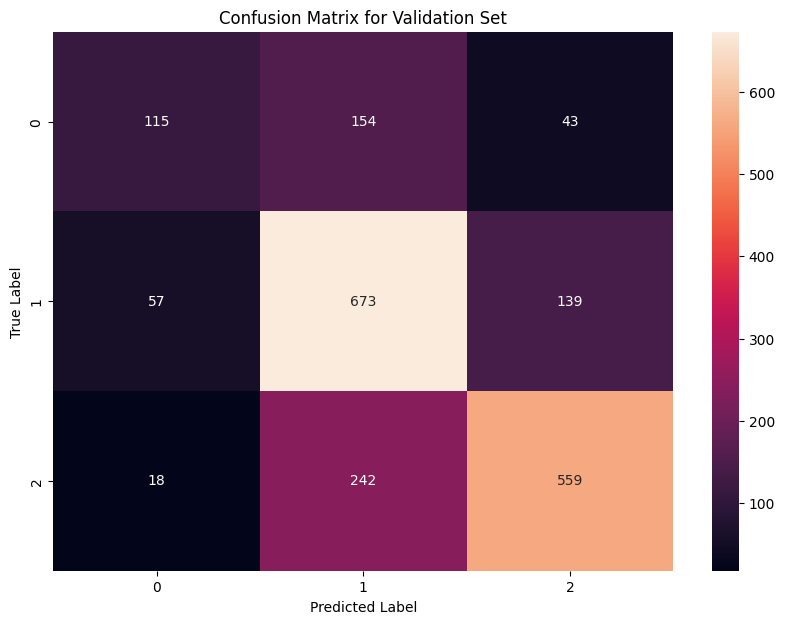

Logistic Regression Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.70      0.28      0.40      3972
           1       0.58      0.81      0.67      5937
           2       0.54      0.55      0.55      2375

    accuracy                           0.59     12284
   macro avg       0.61      0.54      0.54     12284
weighted avg       0.61      0.59      0.56     12284



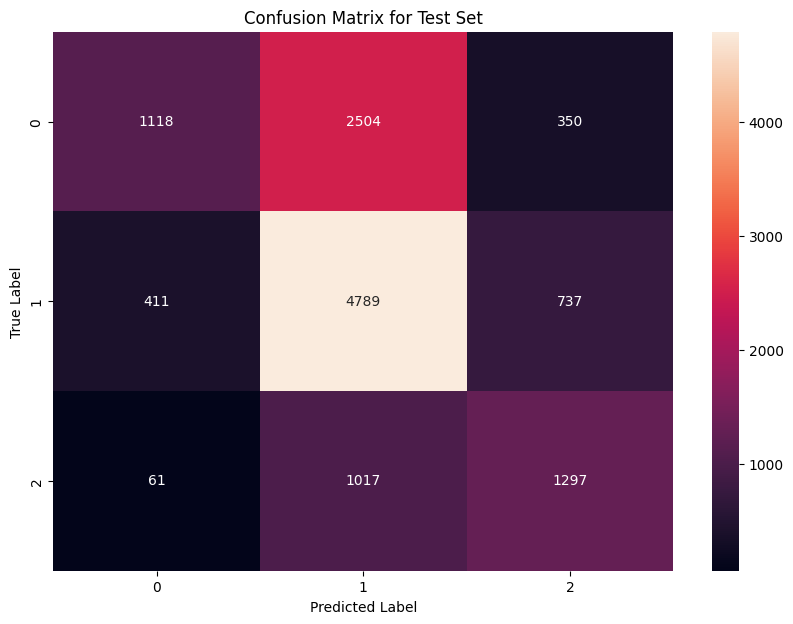

In [ ]:
# Use the validation set for further evaluation
y_pred_val = pipeline.predict(X_val)
print("Logistic Regression Classification Report for Validation Set:")
print(classification_report(y_val, y_pred_val))

# Evaluate the model on the validation set and print the confusion matrix
y_pred_val = pipeline.predict(X_val)
cm_val = confusion_matrix(y_val, y_pred_val)

# Plotting confusion matrix for validation set
plt.figure(figsize=(10,7))
sns.heatmap(cm_val, annot=True, fmt='d')
plt.title('Confusion Matrix for Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Evaluate the model on the testing set
y_pred_test = pipeline.predict(X_test)
print("Logistic Regression Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

# Evaluate the model on the testing set and print the confusion matrix
y_pred_test = pipeline.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plotting confusion matrix for test set
plt.figure(figsize=(10,7))
sns.heatmap(cm_test, annot=True, fmt='d')
plt.title('Confusion Matrix for Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**VADER Lexicon**

In [ ]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Convert dataset splits to DataFrames
train_dataset = pd.DataFrame(dataset['train'])
test_dataset = pd.DataFrame(dataset['test'])
val_dataset = pd.DataFrame(dataset['validation'])

# Function to apply VADER and convert to categorical sentiment
def apply_vader_and_label(data):
    data['vader_sentiment'] = data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    data['vader_sentiment_label'] = data['vader_sentiment'].apply(lambda x: 0 if x < 0 else (2 if x > 0 else 1))
    return data

# Apply to each split
train_dataset = apply_vader_and_label(train_dataset)
test_dataset = apply_vader_and_label(test_dataset)
val_dataset = apply_vader_and_label(val_dataset)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


VADER Classification Report Validation set
              precision    recall  f1-score   support

           0       0.45      0.66      0.53       312
           1       0.63      0.39      0.48       869
           2       0.58      0.72      0.65       819

    accuracy                           0.57      2000
   macro avg       0.55      0.59      0.55      2000
weighted avg       0.58      0.57      0.56      2000



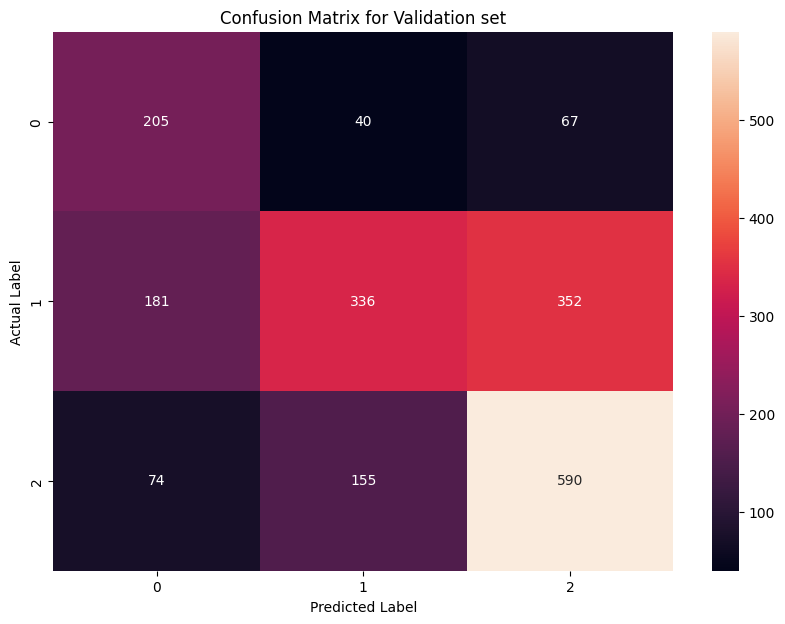

VADER Classification Report Test set
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      3972
           1       0.67      0.45      0.54      5937
           2       0.35      0.67      0.46      2375

    accuracy                           0.53     12284
   macro avg       0.54      0.56      0.52     12284
weighted avg       0.58      0.53      0.54     12284



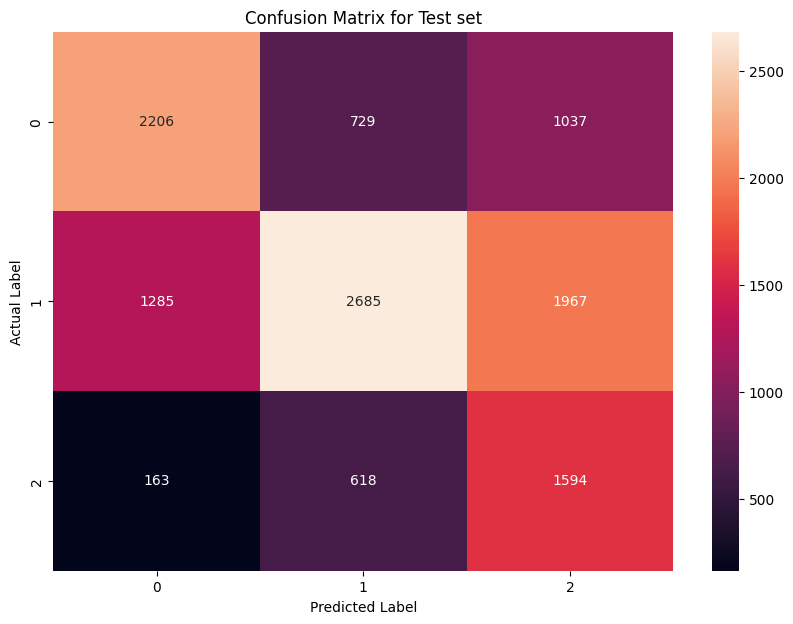

In [ ]:
# Function to print classification report and plot confusion matrix
def report_and_confusion_matrix(data, name):
    print(f"VADER Classification Report {name} set")
    print(classification_report(data['label'], data['vader_sentiment_label']))

    # Plotting confusion matrix
    cm = confusion_matrix(data['label'], data['vader_sentiment_label'])
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name} set')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Generate reports and plot confusion matrices for each split
report_and_confusion_matrix(val_dataset, "Validation")
report_and_confusion_matrix(test_dataset, "Test")

**Random Forest**

In [ ]:
# Hyperparameter Tuning on Training Set
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10,50,100]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Print Best parameters
print("Best parameters:", grid_search_rf.best_params_)

# Extract best parameters and remove the 'rf__' prefix
best_params_rf = {k.replace('rf__', ''): v for k, v in grid_search_rf.best_params_.items()}

# Create a pipeline with the optimized parameters
optimized_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier(**best_params_rf))
])

optimized_rf.fit(X_train, y_train)

Best parameters: {'rf__max_depth': 100, 'rf__n_estimators': 200}


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rf',
                 RandomForestClassifier(max_depth=100, n_estimators=200))])

Random Forest Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79      7093
           1       0.81      1.00      0.89     20673
           2       1.00      0.86      0.92     17849

    accuracy                           0.89     45615
   macro avg       0.93      0.83      0.87     45615
weighted avg       0.91      0.89      0.89     45615



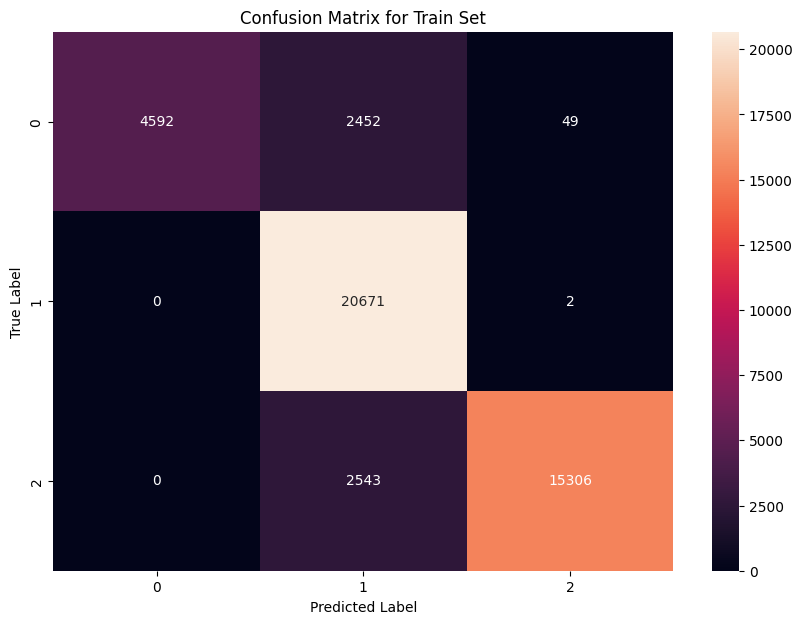

In [ ]:
# Evaluate on Validation Set
y_pred_train = optimized_rf.predict(X_train)
print("Random Forest Classification Report for Validation Set:")
print(classification_report(y_train, y_pred_train))

cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(10,7))
sns.heatmap(cm_train, annot=True, fmt='d')
plt.title('Confusion Matrix for Train Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
y_train.value_counts()

1    20673
2    17849
0     7093
Name: label, dtype: int64

Random Forest Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.70      0.04      0.08       312
           1       0.56      0.84      0.67       869
           2       0.72      0.59      0.65       819

    accuracy                           0.61      2000
   macro avg       0.66      0.49      0.47      2000
weighted avg       0.64      0.61      0.57      2000



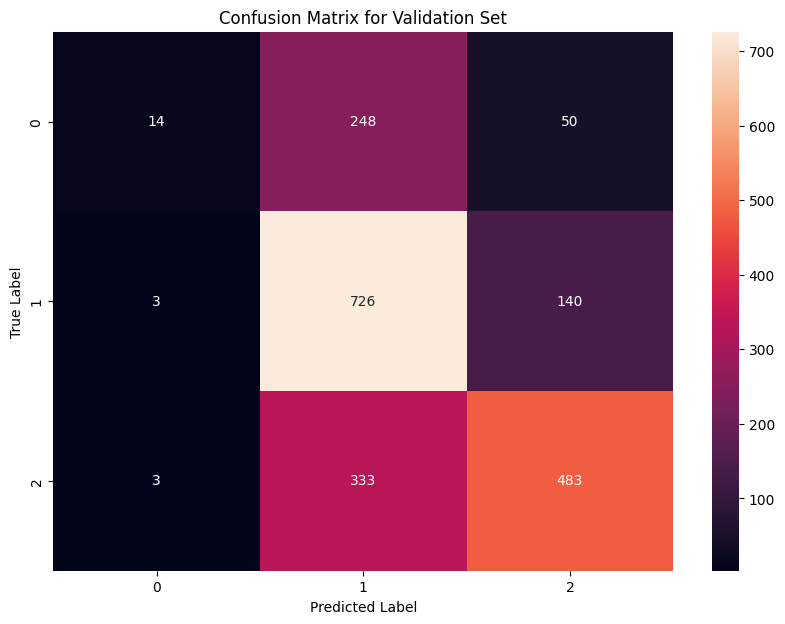

In [ ]:
# Evaluate on Validation Set
y_pred_val = optimized_rf.predict(X_val)
print("Random Forest Classification Report for Validation Set:")
print(classification_report(y_val, y_pred_val))

cm_val = confusion_matrix(y_val, y_pred_val)
plt.figure(figsize=(10,7))
sns.heatmap(cm_val, annot=True, fmt='d')
plt.title('Confusion Matrix for Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Random Forest Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.01      0.03      3972
           1       0.52      0.91      0.67      5937
           2       0.57      0.45      0.50      2375

    accuracy                           0.53     12284
   macro avg       0.67      0.46      0.40     12284
weighted avg       0.66      0.53      0.43     12284



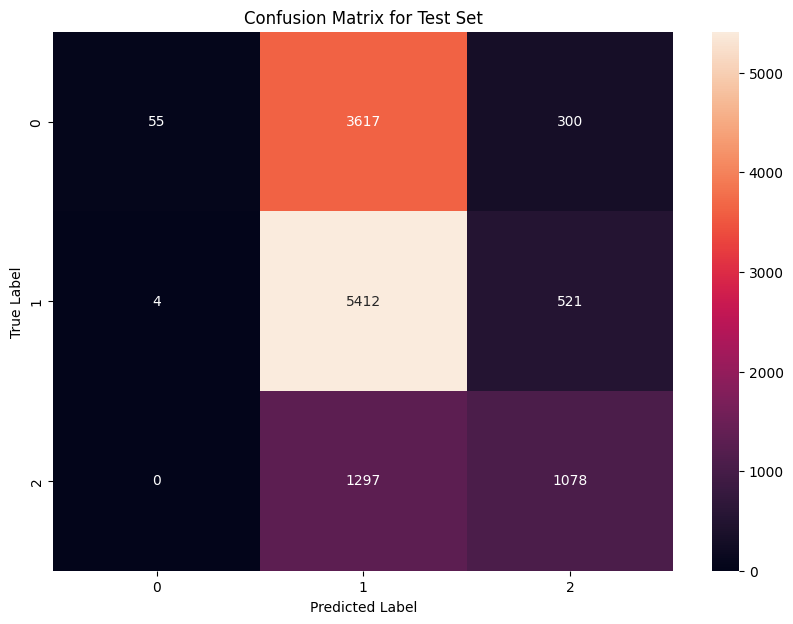

In [ ]:
# Evaluate on Test Set
y_pred_test = optimized_rf.predict(X_test)
print("Random Forest Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10,7))
sns.heatmap(cm_test, annot=True, fmt='d')
plt.title('Confusion Matrix for Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Perceptron**

In [ ]:
# Create a pipeline with TF-IDF and Perceptron
pipeline_perceptron = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('perceptron', Perceptron())
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'perceptron__alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization term
    'perceptron__max_iter': [1000, 2000, 3000],       # Number of epochs
    'perceptron__eta0': [0.1, 0.01, 0.001],           # Learning rate
}

# Perform grid search using only the training set
grid_search = GridSearchCV(pipeline_perceptron, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Extract the best parameters
best_params = grid_search.best_params_

# Train the Perceptron with the best parameters on the training set
pipeline_perceptron.set_params(**best_params).fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('perceptron', Perceptron(eta0=0.01))])

Perceptron Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.51      0.44      0.47       312
           1       0.62      0.62      0.62       869
           2       0.65      0.68      0.66       819

    accuracy                           0.62      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.61      0.62      0.61      2000



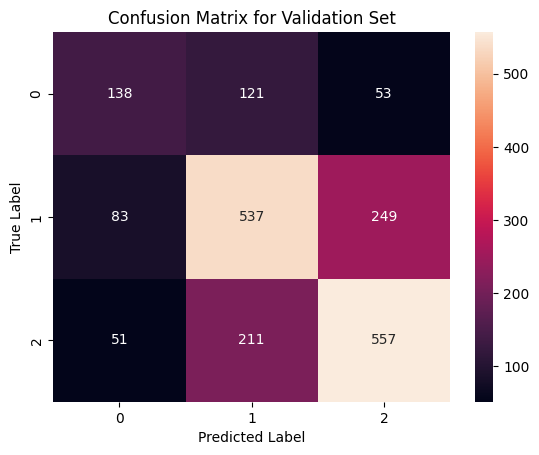

Perceptron Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.56      0.44      0.49      3972
           1       0.58      0.59      0.58      5937
           2       0.44      0.58      0.50      2375

    accuracy                           0.54     12284
   macro avg       0.53      0.54      0.53     12284
weighted avg       0.55      0.54      0.54     12284



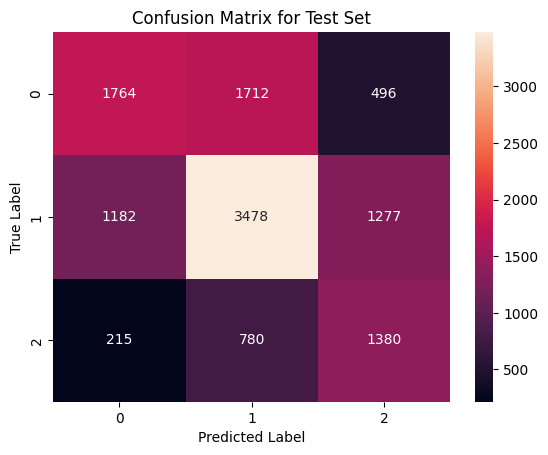

In [ ]:
# Evaluate the model on the validation set
y_val_pred = pipeline_perceptron.predict(X_val)
print("Perceptron Classification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

# Confusion matrix for the validation set
cm_val = confusion_matrix(y_val, y_val_pred)

# Plotting confusion matrix for validation set
sns.heatmap(cm_val, annot=True, fmt='d')
plt.title('Confusion Matrix for Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Evaluate the model on the testing set
y_test_pred = pipeline_perceptron.predict(X_test)
print("Perceptron Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for the testing set
cm_test = confusion_matrix(y_test, y_test_pred)

# Plotting confusion matrix for test set
sns.heatmap(cm_test, annot=True, fmt='d')
plt.title('Confusion Matrix for Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Load the tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Tokenize the text
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Define accuracy metric
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {'accuracy': accuracy_score(labels, predictions)}

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch"
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/45615 [00:00<?, ? examples/s]

Map:   0%|          | 0/12284 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy
1,0.608000,0.622669,0.726000
2,0.496300,0.594361,0.754500
3,0.373700,0.674029,0.743500


TrainOutput(global_step=8553, training_loss=0.5086570230406181, metrics={'train_runtime': 14557.7538, 'train_samples_per_second': 9.4, 'train_steps_per_second': 0.588, 'total_flos': 9001438912247040.0, 'train_loss': 0.5086570230406181, 'epoch': 3.0})

In [ ]:
# Evaluate the model
eval_results = trainer.evaluate()

print("Evaluation Results:", eval_results)

Evaluation Results: {'eval_loss': 0.6740286946296692, 'eval_accuracy': 0.7435, 'eval_runtime': 60.2672, 'eval_samples_per_second': 33.186, 'eval_steps_per_second': 2.074, 'epoch': 3.0}


In [ ]:
# Get predictions
predictions = trainer.predict(tokenized_datasets["validation"])

In [ ]:
# Get the predicted labels
predicted_labels_val = np.argmax(predictions.predictions, axis=-1)

# Actual labels
true_labels_val = predictions.label_ids

RoBERTa Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       312
           1       0.74      0.68      0.71       869
           2       0.79      0.82      0.80       819

    accuracy                           0.74      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.74      0.74      0.74      2000



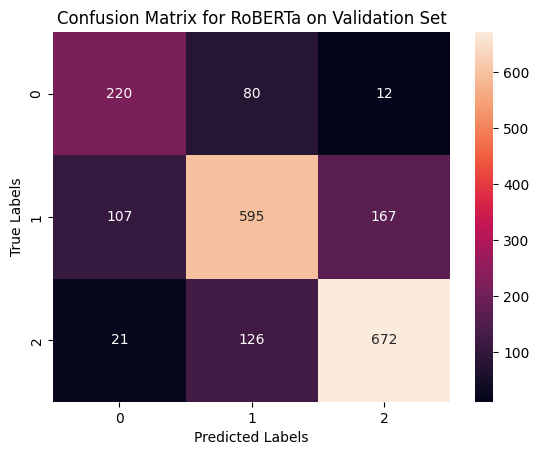

In [ ]:
# Print classification report
print("RoBERTa Classification Report for Validation Set:")
print(classification_report(true_labels_val, predicted_labels_val))

# Generate and visualize the confusion matrix
cm_test = confusion_matrix(true_labels_val, predicted_labels_val)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.title('Confusion Matrix for RoBERTa on Validation Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# 'tokenized_datasets' contains the tokenized test set
test_dataset = tokenized_datasets["test"]

In [ ]:
# Evaluate the model on the test set
test_predictions = trainer.predict(test_dataset)

In [ ]:
# Process the predictions
predicted_labels_test = np.argmax(test_predictions.predictions, axis=-1)
true_labels_test = test_predictions.label_ids

RoBERTa Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.71      0.79      0.74      3972
           1       0.76      0.63      0.68      5937
           2       0.62      0.77      0.69      2375

    accuracy                           0.71     12284
   macro avg       0.69      0.73      0.71     12284
weighted avg       0.71      0.71      0.70     12284



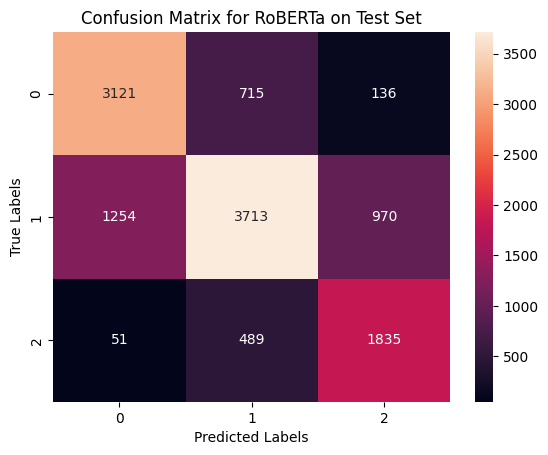

In [ ]:
# Generate a classification report
print("RoBERTa Classification Report for Test Set:")
print(classification_report(true_labels_test, predicted_labels_test))

# Generate and visualize the confusion matrix
cm_test = confusion_matrix(true_labels_test, predicted_labels_test)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.title('Confusion Matrix for RoBERTa on Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Remove rows where 'cleaned_tweet' is NaN
sample_tweets = sample_tweets.dropna(subset=['cleaned_tweet'])

In [ ]:
# Tokenize the tweets
tokenized_sample_tweets = tokenizer(sample_tweets['cleaned_tweet'].tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")

Becuase I am using Colab, let's confirm my device.

In [ ]:
# Check model device
next(model.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Move tokenized data to the GPU
tokenized_sample_tweets = {k: v.to(next(model.parameters()).device) for k, v in tokenized_sample_tweets.items()}

In [ ]:
# Function for prediction
def predict_in_batches(model, dataset, batch_size=32):
    model.eval()
    predictions = []

    for i in range(0, len(dataset[list(dataset.keys())[0]]), batch_size):
        batch = {k: v[i:i+batch_size].to(model.device) for k, v in dataset.items()}
        with torch.no_grad():
            outputs = model(**batch)
            logits = outputs.logits
            preds = torch.argmax(torch.nn.functional.softmax(logits, dim=-1), dim=-1)
            predictions.extend(preds.cpu().numpy())

    return predictions

In [ ]:
# Predict in batches
predicted_labels = predict_in_batches(model, tokenized_sample_tweets, batch_size=32)

# Ensure the lengths match
assert len(predicted_labels) == len(sample_tweets), "Mismatch in lengths of predictions and DataFrame."

# Add predictions to DataFrame
sample_tweets['predicted_sentiment'] = predicted_labels

In [ ]:
# Let's look at some predicted_sentiments
sample_tweets.iloc[50:70]

,year,month,username,tweet,cleaned_tweet,predicted_sentiment
50,2022,2,norriegche07,tim dillon goes off on the bitcoin conference ...,tim dillon go bitcoin conference handle heckle...,1
51,2021,10,aexsegg,@bitcoin_monk @olya_borderless @cryptonawaz at...,monk borderless like tiny fraction compare unv...,0
52,2021,2,MarioMartReq,@edugaresp el bitcoin ahora mismo a 53k @remin...,el bitcoin ahora mismo ofthis three years,1
53,2021,1,BlockWatcher,"sun jan 31 05:28:35 2021 (3:43)\nusd : 33,991....",sun jan usd wght blk size txs pool mb bitcoin,1
54,2022,6,InfinityTokenIO,rewards are available for claim!\n\nmined #bit...,reward available claim mine bitcoin gt ethereu...,1
55,2021,8,DefencePirc,@empty_banks i honestly want bitcoin to be in ...,bank honestly want bitcoin weeks accumulate,1
56,2021,11,UAPVee,@ruralindia @sonaliranade very poor article. s...,poor article idea talk seem think bitcoin cryp...,0
57,2021,5,sunrise_guide,https://t.co/kcfjtdqubo #industryevents #bitco...,industryevents bitcoin alexgladstein interview...,1
58,2022,3,johny_0722,#bitcoin at 9:05am and then 9:07am. https://t....,bitcoin,1
59,2021,1,hrizek,30k before 2021? #bitcoin @novogratz ?,bitcoin,1


Looking at some negative tweets.

In [ ]:
# 56th document
sample_tweets['tweet'].iloc[56]

'@ruralindia @sonaliranade very poor article. she has no idea what she is talking about. she seems to think bitcoin is the only cryptocurrency “coin” around whereas cryptocurrency market is much more than bitcoin.'

In [ ]:
# 65th document
sample_tweets['tweet'].iloc[65]

"@paultang chainanalysis is the weapon against criminal money and it's very effective. that's why criminals prefer #fiat money over #bitcoin.  so first get your facts right."

In [ ]:
# Define the directory
output_dir = '/content/gdrive/MyDrive/Capstone/Bitcoin/'

# Define the file name
file_name = 'sample_tweets.csv'

# Save the DataFrame to a CSV file in Google Drive
sample_tweets.to_csv(output_dir + file_name, index=False)

In [ ]:
# Retrieve in case of session crash
csv_path = '/content/gdrive/MyDrive/Capstone/Bitcoin/sample_tweets.csv'

# Load the DataFrame
sample_tweets = pd.read_csv(csv_path, lineterminator='\n')

In [ ]:
# sentiment distribution
sample_tweets['predicted_sentiment'].value_counts()

1    712531
2    154405
0    132837
Name: predicted_sentiment, dtype: int64

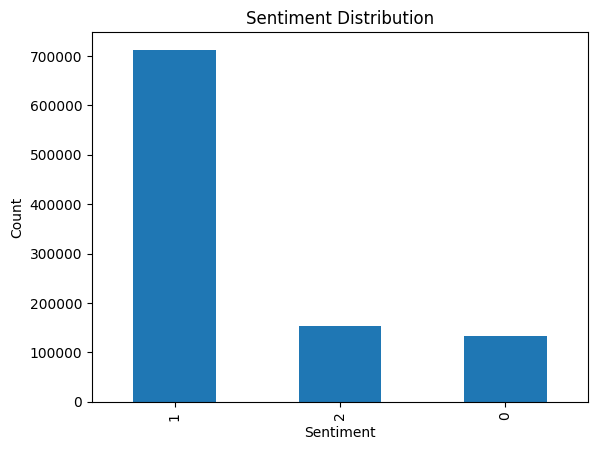

In [ ]:
# Let's visualize sentiment distribution
sample_tweets['predicted_sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Sentiment Distribution by Year and Month')

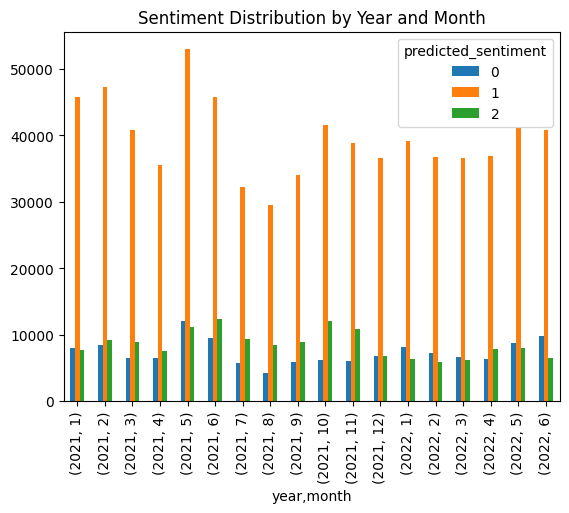

In [ ]:
# Sentiment distribution by year - month
sample_tweets.groupby(['year', 'month', 'predicted_sentiment']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Sentiment Distribution by Year and Month')

Text(0.5, 1.0, 'Sentiment Distribution by Year and Month')

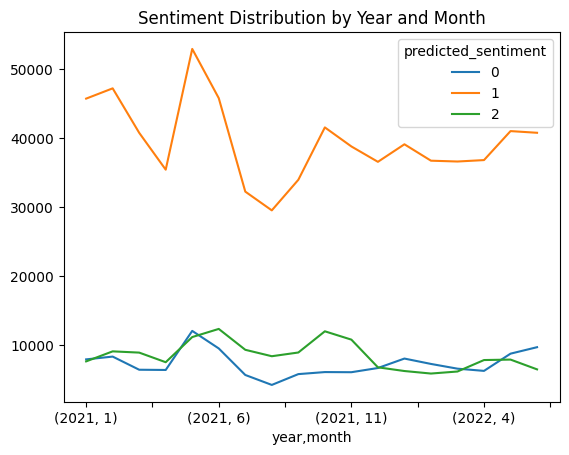

In [ ]:
# Sentiment Distribution Year - month in line chart
sample_tweets.groupby(['year', 'month', 'predicted_sentiment']).size().unstack().plot(kind='line')
plt.title('Sentiment Distribution by Year and Month')

Text(0.5, 1.0, 'Average Sentiment Distribution by Year and Month')

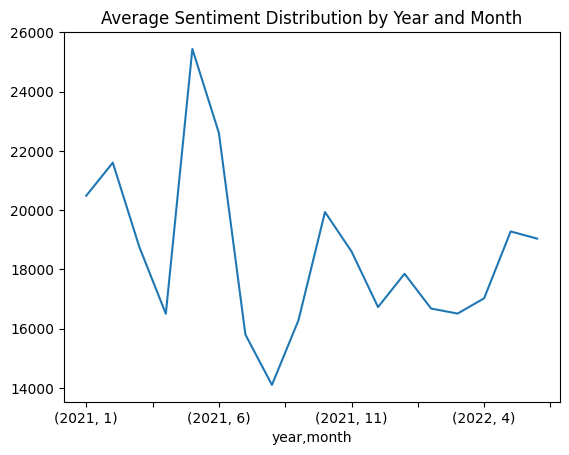

In [ ]:
# Avergae Sentiment distribution in line chart
sample_tweets.groupby(['year', 'month', 'predicted_sentiment']).size().unstack().mean(axis=1).plot(kind='line')
plt.title('Average Sentiment Distribution by Year and Month')

Bitcoin U.S. Dollar Chart from 2021-2022

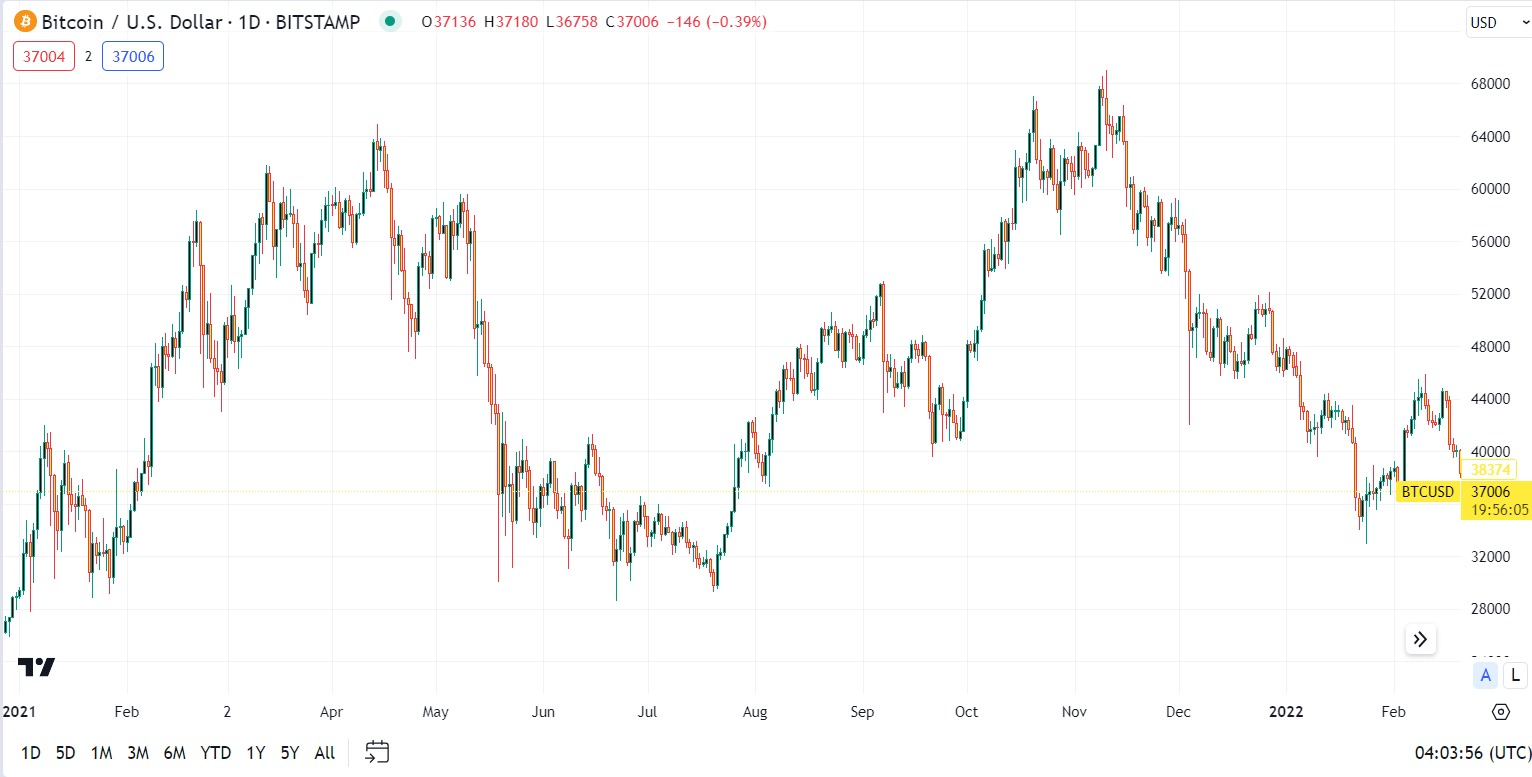

In [ ]:
# Count of tweets per month
monthly_tweet_count = sample_tweets.groupby(['year', 'month']).size().reset_index(name='count')

In [ ]:
# Calculate monthly average sentiment
monthly_avg_sentiment = sample_tweets.groupby(['year', 'month', 'predicted_sentiment']).size().unstack().mean(axis=1).reset_index(name='avg_sentiment')

# Merge the datasets
monthly_data = pd.merge(monthly_tweet_count, monthly_avg_sentiment, on=['year', 'month'])

# Create a combined 'year-month' column
monthly_data['month_year'] = monthly_data['year'].astype(str) + '-' + monthly_data['month'].astype(str).str.zfill(2)

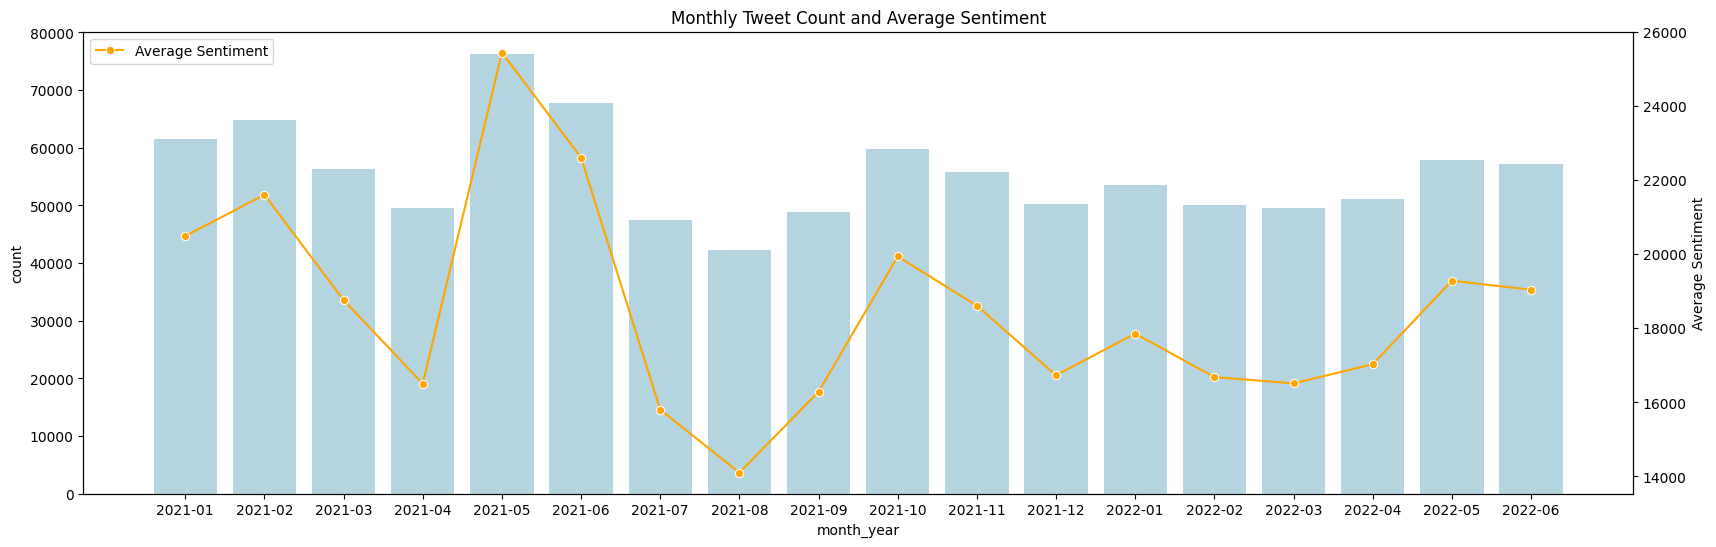

In [ ]:
# Set figure size
plt.figure(figsize=(20, 6))

# Create bar chart for tweet count
sns.barplot(x='month_year', y='count', data=monthly_data, color='lightblue', label='Tweet Count')

# Create line chart for average sentiment
plt.twinx()  # Create a second y-axis
sns.lineplot(x='month_year', y='avg_sentiment', data=monthly_data, marker='o', color='orange', label='Average Sentiment')

# Labels and title
plt.title('Monthly Tweet Count and Average Sentiment')
plt.xlabel('Month-Year')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)

# Show legend
plt.legend(loc='upper left')

plt.show()

Bitcoin U.S. Dollar Chart from 2021-2022

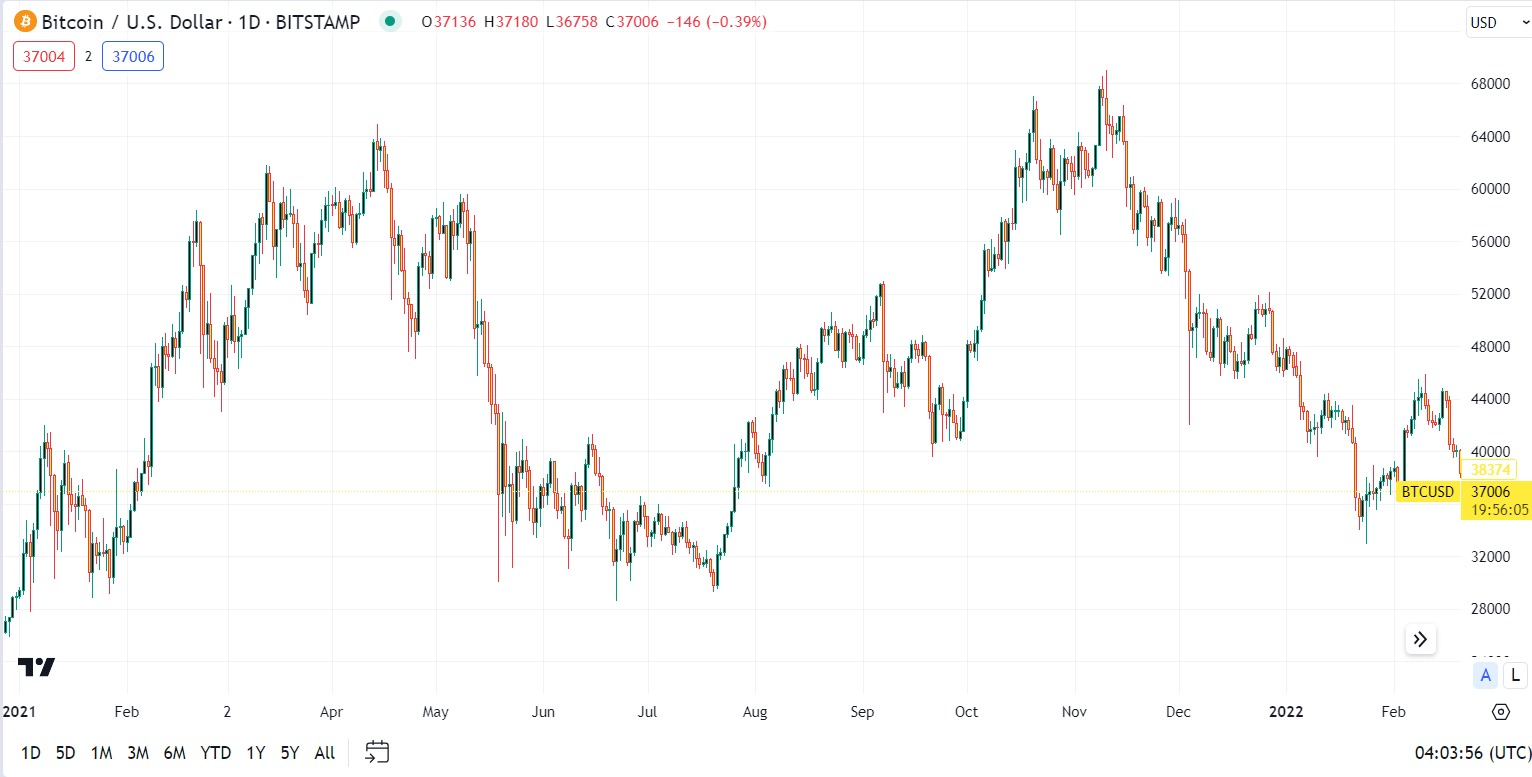

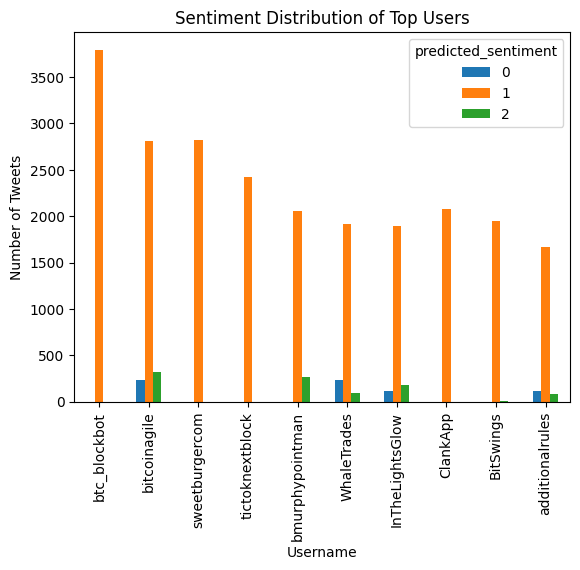

In [ ]:
# Group by username and sentiment_category, then count tweets
user_sentiment_counts = sample_tweets.groupby(['username', 'predicted_sentiment']).size().unstack().fillna(0)

# Sum across sentiment categories for each user
user_total_tweets = user_sentiment_counts.sum(axis=1)

# Sort users by total number of tweets
most_active_users = user_total_tweets.sort_values(ascending=False)

# Select the top N most active users for visualization
top_users = user_sentiment_counts.loc[most_active_users.head(10).index]

# Plot a stacked bar chart
top_users.plot(kind='bar', stacked=False, title='Sentiment Distribution of Top Users')
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.show()

In [ ]:
# Function for wordcloud
def create_wordcloud(text):
    words=' '.join([words for words in text])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

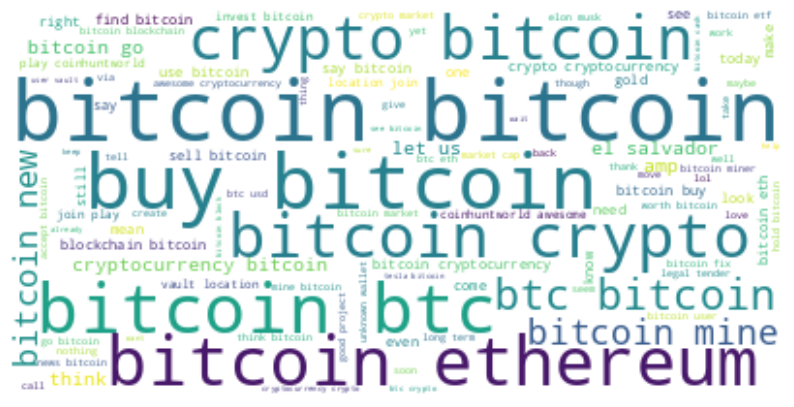

In [ ]:
# wordcloud for all tweets
create_wordcloud(sample_tweets["cleaned_tweet"].values)

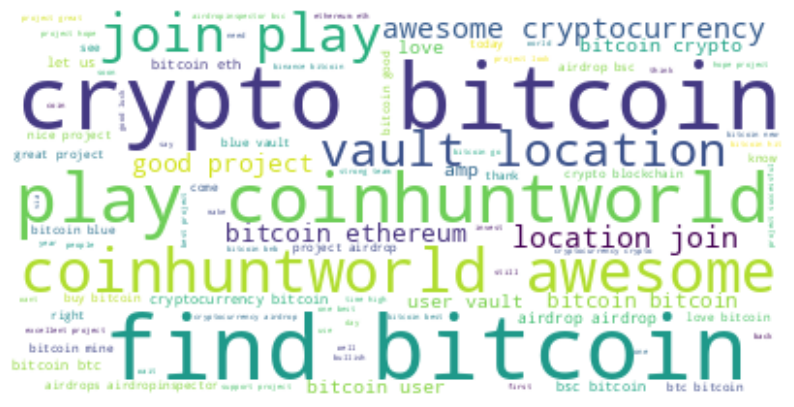

In [ ]:
# wordcloud for positive tweets
create_wordcloud(sample_tweets[sample_tweets['predicted_sentiment']==2]['cleaned_tweet'].values)

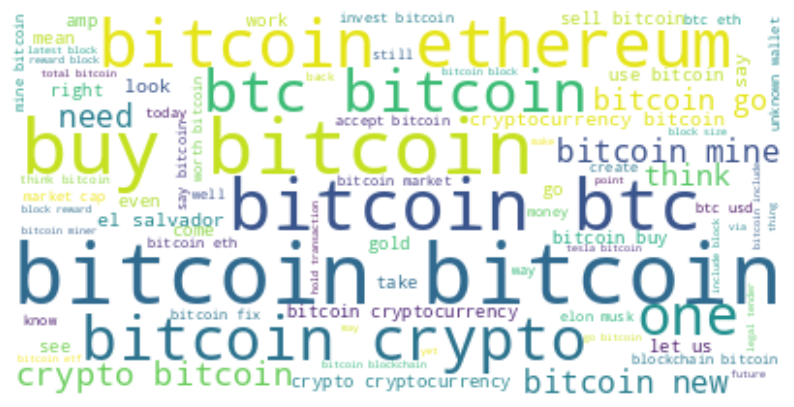

In [ ]:
# wordcloud for neutral tweets
create_wordcloud(sample_tweets[sample_tweets['predicted_sentiment']==1]['cleaned_tweet'].values)

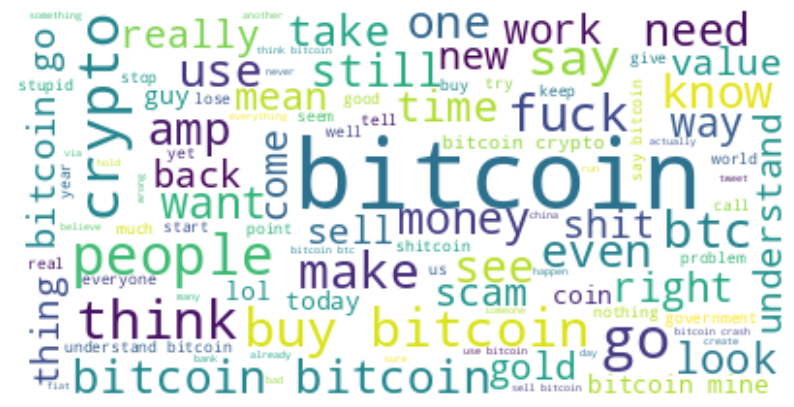

In [ ]:
# wordcloud for negative tweets
create_wordcloud(sample_tweets[sample_tweets['predicted_sentiment']==0]['cleaned_tweet'].values)

Let's identify some influencers

In [ ]:
# https://influencermarketinghub.com/crypto-twitter-influencers/

influential_username = ['bitboy_crypto', 'SBF_FTX', 'elonmusk', 'VitalikButerin', 'rogerkver', 'APompliano', 'adam3us', 'aantonop', 'WhalePanda', 'CamiRusso', 'AltcoinSara',
                        'cz_binance','SatoshiLite', 'TimDraper','girlgone_crypto','SatoshiLite','saylor','Natbrunell','thebrianjung','Excellion',
                        'ethereumJoseph', 'RAFAELA_RIGO_', 'brockpierce', 'SheldonEvans', 'LayahHeilpern', 'Nicholas_Merten', 'bgarlinghouse', 'CryptoWendyO', 'Matt_Hougan',
                        'justinsuntron', 'CryptoCred', 'ErikVoorhees']

In [ ]:
# Count of tweets by influential accounts
# https://coinculture.com/au/people/most-influential-people-crypto-2021/

sample_tweets[sample_tweets['username'].isin(influential_username)]

,year,month,username,tweet,cleaned_tweet,predicted_sentiment
377,2021,10,adam3us,@bstofka @gladstein each day is a good day for...,day good day bitcoin el salvador,2
8744,2021,6,Excellion,volcano mining was inevitable. 🌋 #bitcoin http...,volcano mine inevitable bitcoin,1
9362,2021,6,Excellion,@btcmanhattan let’s see! #bitcoin is hope.,let us see bitcoin hope,2
11746,2021,7,APompliano,5/ and since 60% of americans don't have inves...,since americans not investments outside retire...,1
11954,2021,3,LayahHeilpern,@lawrencekingyo i hope you own bitcoin sirrrrrrr,hope bitcoin sirrrrrrr,2
...,...,...,...,...,...,...
998369,2022,4,adam3us,@itsliran @giacomozucco @mrhodl @4moonsettler ...,miss obvious point activation not vote machine...,1
998427,2022,2,adam3us,@maxkeiser @jpmorgan nah bitcoin is cheap at $...,nah bitcoin cheap go,1
998799,2021,8,ErikVoorhees,our illustrious @daniwall___ on the first step...,illustrious first step take transition io empl...,2
999332,2022,5,Excellion,supply shock is coming. #bitcoin https://t.co/...,supply shock come bitcoin,1


In [ ]:
# dataframe of all influential tweets
influential_tweets = sample_tweets[sample_tweets['username'].isin(influential_username)]

In [ ]:
influential_tweets.shape

(682, 6)

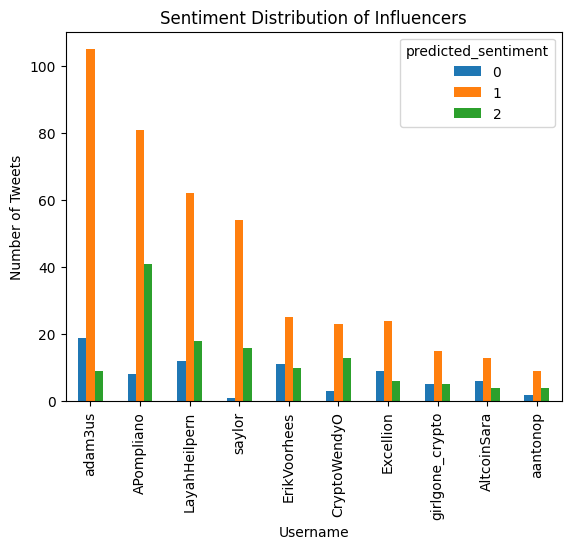

In [ ]:
# Group by username and sentiment_category, then count tweets
influential_user_sentiment_counts = influential_tweets.groupby(['username', 'predicted_sentiment']).size().unstack().fillna(0)

# Sum across sentiment categories for each user
user_total_tweets = influential_user_sentiment_counts.sum(axis=1)

# Sort users by total number of tweets
most_active_users = user_total_tweets.sort_values(ascending=False)

# Select the top N most active users for visualization
top_users = influential_user_sentiment_counts.loc[most_active_users.head(10).index]

# Plot a stacked bar chart
top_users.plot(kind='bar', stacked=False, title='Sentiment Distribution of Influencers')
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.show()

In [ ]:
# Count of tweets per month
influential_tweet_count = influential_tweets.groupby(['year', 'month']).size().reset_index(name='count')

In [ ]:
# Calculate monthly average sentiment
influential_avg_sentiment = influential_tweets.groupby(['year', 'month', 'predicted_sentiment']).size().unstack().mean(axis=1).reset_index(name='influential_avg_sentiment')

# Merge the datasets
monthly_data = pd.merge(influential_tweet_count, influential_avg_sentiment, on=['year', 'month'])

# Create a combined 'year-month' column
monthly_data['month_year'] = monthly_data['year'].astype(str) + '-' + monthly_data['month'].astype(str).str.zfill(2)

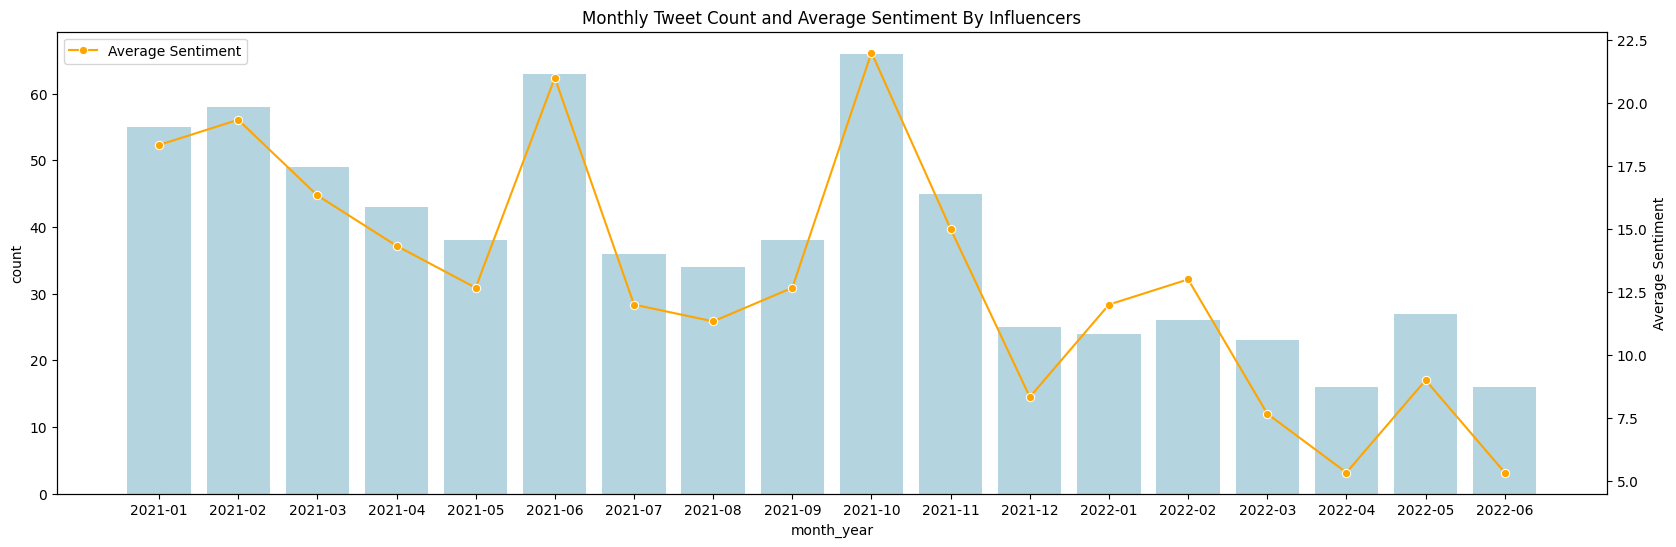

In [ ]:
# Set figure size
plt.figure(figsize=(20, 6))

# Create bar chart for tweet count
sns.barplot(x='month_year', y='count', data=monthly_data, color='lightblue', label='Tweet Count')

# Create line chart for average sentiment
plt.twinx()  # Create a second y-axis
sns.lineplot(x='month_year', y='influential_avg_sentiment', data=monthly_data, marker='o', color='orange', label='Average Sentiment')

# Labels and title
plt.title('Monthly Tweet Count and Average Sentiment By Influencers')
plt.xlabel('Month-Year')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)

# Show legend
plt.legend(loc='upper left')

plt.show()

Bitcoin U.S. Dollar Chart from 2021-2022

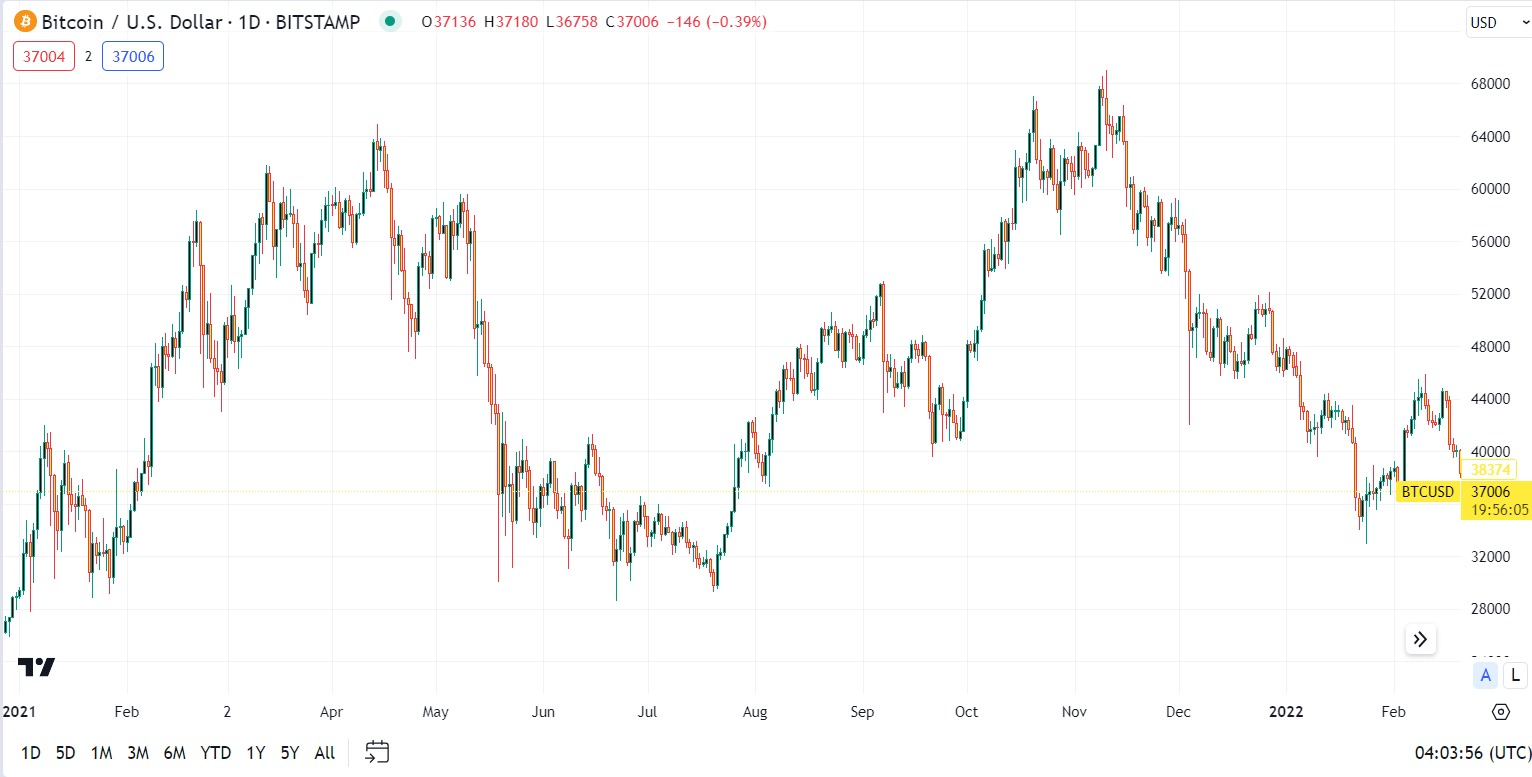

In [ ]:
# Let's look at some tweets by influencers from June 2021
list(influential_tweets['cleaned_tweet'][(influential_tweets['year']==2021)&(influential_tweets['month']==6)][:20])

['volcano mine inevitable bitcoin',
 'let us see bitcoin hope',
 'wonderful england right sun shin everyone happy ready annoy everyone bitcoin heheee wonderful weekend',
 'peter brandt post screenshot say gang go together bitcoin delete later fuck idiots everywhere',
 'cf stanley druckenmiller turn none sell bitcoin ers',
 'mean like maybe want stretch definitions multiple dozen company serve vast majority bitcoin users none mean agree support not party',
 'us dollar not reserve currency world bitcoin move bitcoin rail',
 'appear elon musk agree public conversation jack dorsey bitcoin',
 'fizz not one compare every project bitcoin see immense value bitcoin amp see immense value project like list not care virgin birth care utility efficacy toward purpose whole point bitcoin',
 'bitcoin mine council voluntary open forum bitcoin miners commit network core principles promote transparency share best practice educate public benefit bitcoin bitcoin mine join us',
 'not not true one disproof e

Let's look at what market related terminologies does our corpus hold.

In [ ]:
relevant_terms = ['market', 'buy', 'sell', 'trend', 'bullish', 'liquidation', 'sell-off', 'pump and dump', 'consolidate', 'capital gain', 'buy back','buyback',
                   'sell off','trade', 'exchange', 'risk', 'margin', 'analysis', 'bear market', 'bull market', 'bubble', 'correction', 'death cross']

In [ ]:
# Initialize a dictionary to hold the counts
word_counts = {word: 0 for word in relevant_terms}

# Iterate over each tweet and check if the word is in the tweet
for tweet in sample_tweets['cleaned_tweet']:
    for word in relevant_terms:
        if word in tweet:  # Directly check for word in tweet
            word_counts[word] += 1

word_counts

{'market': 52392,
 'buy': 82882,
 'sell': 31975,
 'trend': 10599,
 'bullish': 11358,
 'liquidation': 947,
 'sell-off': 0,
 'pump and dump': 0,
 'consolidate': 715,
 'capital gain': 467,
 'buy back': 569,
 'buyback': 124,
 'sell off': 102,
 'trade': 19320,
 'exchange': 18080,
 'risk': 7268,
 'margin': 887,
 'analysis': 3896,
 'bear market': 3309,
 'bull market': 1960,
 'bubble': 2807,
 'correction': 2603,
 'death cross': 400}

In [ ]:
# Sum of all the values in the word_counts dictionary
total_count = sum(word_counts.values())
total_count

252660

Only ~25% of this dataset has important market related terminology.

With better data collection and increased model accuarcy, public sentiment from social media discourse can certainly act as an one of the indicators of market trends.